In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv(r'C:\Users\vyshn\Downloads\bounce-rate.csv')

In [3]:
data.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
0,5.778476e+08,367,00:01:35,87.19%
1,1.583822e+09,260,00:01:04,29.62%
2,1.030699e+09,237,00:00:02,99.16%
3,1.025030e+09,226,00:02:22,25.66%
4,1.469968e+09,216,00:01:23,46.76%


In [4]:
data.isna().sum()

Client ID                0
Sessions                 0
Avg. Session Duration    0
Bounce Rate              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    object 
 3   Bounce Rate            999 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [6]:
data['Avg. Session Duration'] = data['Avg. Session Duration'].str[1:]
data['Avg. Session Duration'] = pd.to_timedelta(data['Avg. Session Duration'])
data['Avg. Session Duration'] = data['Avg. Session Duration'] / pd.Timedelta(minutes=1)
data['Bounce Rate'] = data['Bounce Rate'].str.strip('%').astype('float')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    float64
 3   Bounce Rate            999 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.3 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Client ID,999.0,1.036401e+09,6.151503e+08,184918.168076,4.801824e+08,1.029507e+09,1.587982e+09,2.063338e+09
Sessions,999.0,3.225926e+01,2.465859e+01,17.000000,2.100000e+01,2.500000e+01,3.500000e+01,3.670000e+02
Avg. Session Duration,999.0,3.636520e+00,4.040562e+00,0.000000,8.916667e-01,2.466667e+00,4.816667e+00,3.066667e+01
Bounce Rate,999.0,6.530798e+01,2.299727e+01,4.880000,4.737000e+01,6.667000e+01,8.519000e+01,1.000000e+02


correlation matrix

<Axes: >

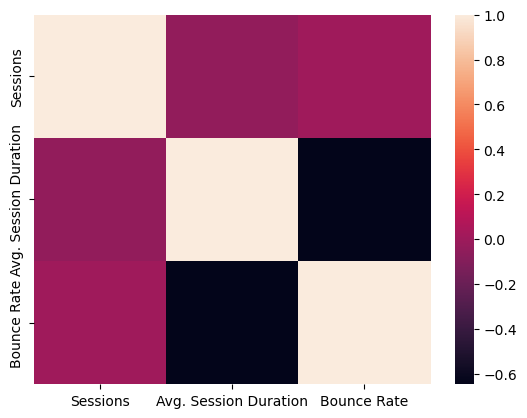

In [9]:
sns.heatmap(data[['Sessions', 'Avg. Session Duration','Bounce Rate']].corr())

analyze User Engagement by analyzing the bounce rates of the users

<Axes: xlabel='Bounce Rate Segment', ylabel='count'>

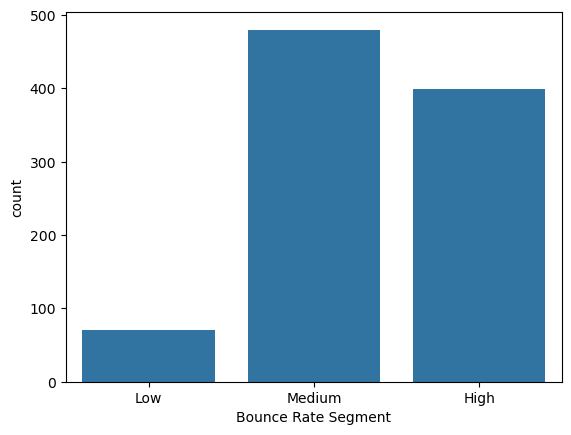

In [11]:
#defining the bounce rate for high, medium, and low bounce rate
high_bounce_rate_threshold = 70
low_bounce_rate_threshold = 30

#segement the clients based on the bounce rate
data['Bounce Rate Segment'] = pd.cut(data['Bounce Rate'],
                            bins=[0, low_bounce_rate_threshold,high_bounce_rate_threshold,100],
                            labels=['Low','Medium', 'High'], right=False)

#count the number of clients in each segment
segment_count = data['Bounce Rate Segment'].value_counts().sort_index()

sns.barplot(segment_count)

In [12]:
segment_count

Bounce Rate Segment
Low        71
Medium    480
High      399
Name: count, dtype: int64

average session duration of the users in each bounce rate segment:



<Axes: xlabel='Bounce Rate Segment', ylabel='Avg. Session Duration'>

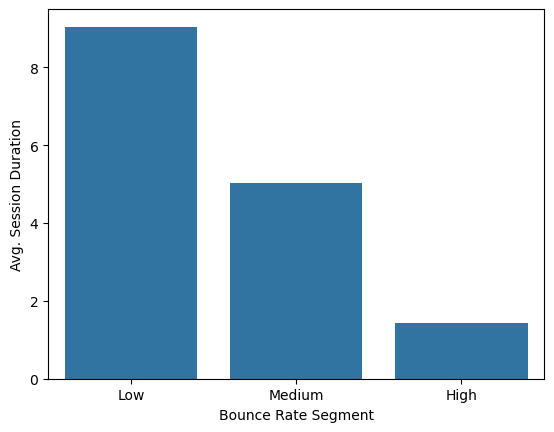

In [23]:
segment_average_duration = data.groupby('Bounce Rate Segment',observed=True)['Avg. Session Duration'].mean().reset_index()

sns.barplot(segment_average_duration,x='Bounce Rate Segment', y='Avg. Session Duration')

In [19]:
segment_average_duration

,Bounce Rate Segment,Avg. Session Duration
0,Low,9.046479
1,Medium,5.038854
2,High,1.433417


top 10 loyal users according to the number of sessions and average session duration:



In [26]:
data['total session duration'] = data['Sessions'] * data['Avg. Session Duration']

data.sort_values('total session duration', ascending=False).head(10)

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,total session duration
20,1.884620e+09,93,30.666667,16.13,Low,2852.000000
54,1.041722e+09,67,20.500000,22.39,Low,1373.500000
262,8.756557e+08,34,29.966667,26.47,Low,1018.866667
10,1.461865e+09,117,8.450000,48.72,Medium,988.650000
173,1.849182e+05,40,24.416667,17.50,Low,976.666667
15,1.049234e+09,99,9.716667,34.34,Medium,961.950000
310,2.026953e+09,31,22.116667,35.48,Medium,685.616667
24,1.903206e+09,90,7.016667,36.67,Medium,631.500000
211,2.054569e+09,37,16.250000,35.14,Medium,601.250000
402,6.220935e+08,28,21.300000,39.29,Medium,596.400000


relationship between the average session duration and the bounce rates:



<Axes: xlabel='Bounce Rate', ylabel='Avg. Session Duration'>

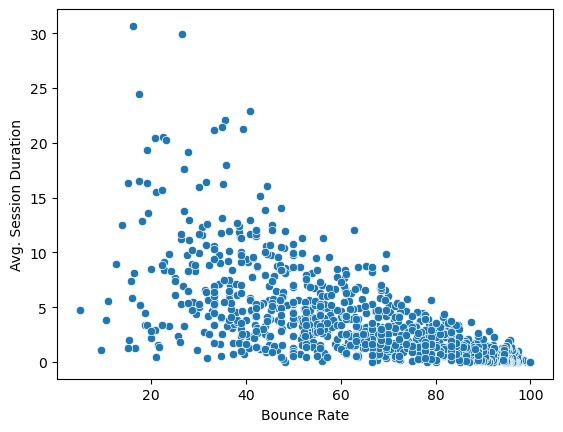

In [28]:
sns.scatterplot(data, y='Avg. Session Duration', x='Bounce Rate')

So there is a negative linear relationship between the average session duration and bounce rates (which is ideal here). It means a high number of average session duration results in lower bounce rates.



create retention segments based on the number of sessions:



In [30]:
data.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,total session duration
0,5.778476e+08,367,1.583333,87.19,High,581.083333
1,1.583822e+09,260,1.066667,29.62,Low,277.333333
2,1.030699e+09,237,0.033333,99.16,High,7.900000
3,1.025030e+09,226,2.366667,25.66,Low,534.866667
4,1.469968e+09,216,1.383333,46.76,Medium,298.800000


In [31]:
data['Sessions'].mean()

32.25925925925926

In [32]:
def get_user_retention(row):
    if row['Sessions'] > 32.25:
        return 'Frequent User'
    else:
        return 'Ocassional User'
    
data['Retension Segment'] = data.apply(get_user_retention, axis=1)

In [39]:
data.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,total session duration,Retension Segment
0,5.778476e+08,367,1.583333,87.19,High,581.083333,Frequent User
1,1.583822e+09,260,1.066667,29.62,Low,277.333333,Frequent User
2,1.030699e+09,237,0.033333,99.16,High,7.900000,Frequent User
3,1.025030e+09,226,2.366667,25.66,Low,534.866667,Frequent User
4,1.469968e+09,216,1.383333,46.76,Medium,298.800000,Frequent User


the average bounce rate by retention segment:

<Axes: xlabel='Retension Segment', ylabel='Bounce Rate'>

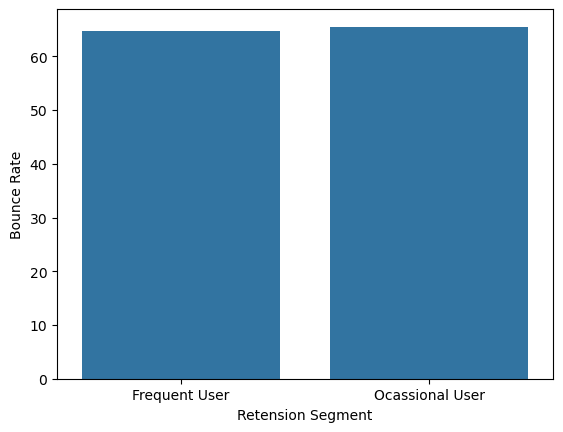

In [41]:
avg_bounce_rate = data.groupby('Retension Segment')['Bounce Rate'].mean().reset_index()

sns.barplot(avg_bounce_rate, x='Retension Segment', y='Bounce Rate')

 the percentage of retained users:



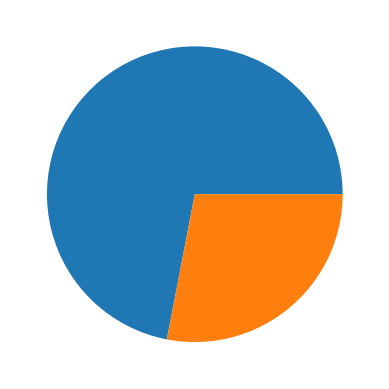

In [47]:
count = data['Retension Segment'].value_counts()

plt.pie(count);